### This Regression Analysis seeks to uncover the effect of various factors like Sleep Hours, Previous Scores etc on Student Performance Index.

In [1]:
#Importing Relevant Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [7]:
#Reading the data set to Jupyter Notebook
data = pd.read_csv("Student_Performance.csv")

In [8]:
#Loading the data set
data.head(n=5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [12]:
# Replace spaces with underscores in column names
data.columns = df.columns.str.replace(' ', '_')

In [13]:
#Checking the shape of the data
data.shape

(10000, 6)

In [14]:
#To understand the internal make up of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours_Studied                     10000 non-null  int64  
 1   Previous_Scores                   10000 non-null  int64  
 2   Extracurricular_Activities        10000 non-null  object 
 3   Sleep_Hours                       10000 non-null  int64  
 4   Sample_Question_Papers_Practiced  10000 non-null  int64  
 5   Performance_Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [15]:
#Running Preliminary statistics on the data
data.describe()

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


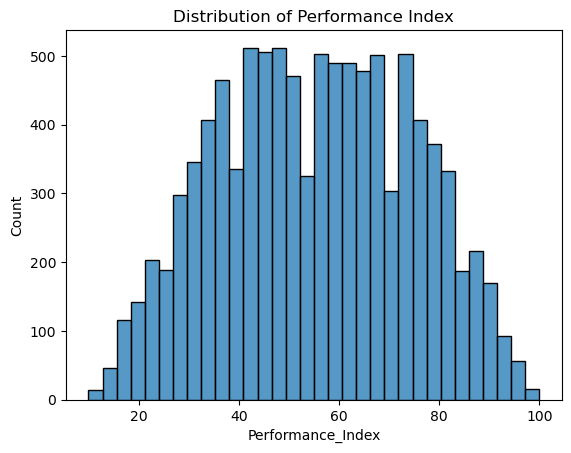

In [17]:
# Create a histogram of the Student's Performance Distribution.

fig = sns.histplot(data['Performance_Index'])

# Add a title
fig.set_title('Distribution of Performance Index');

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

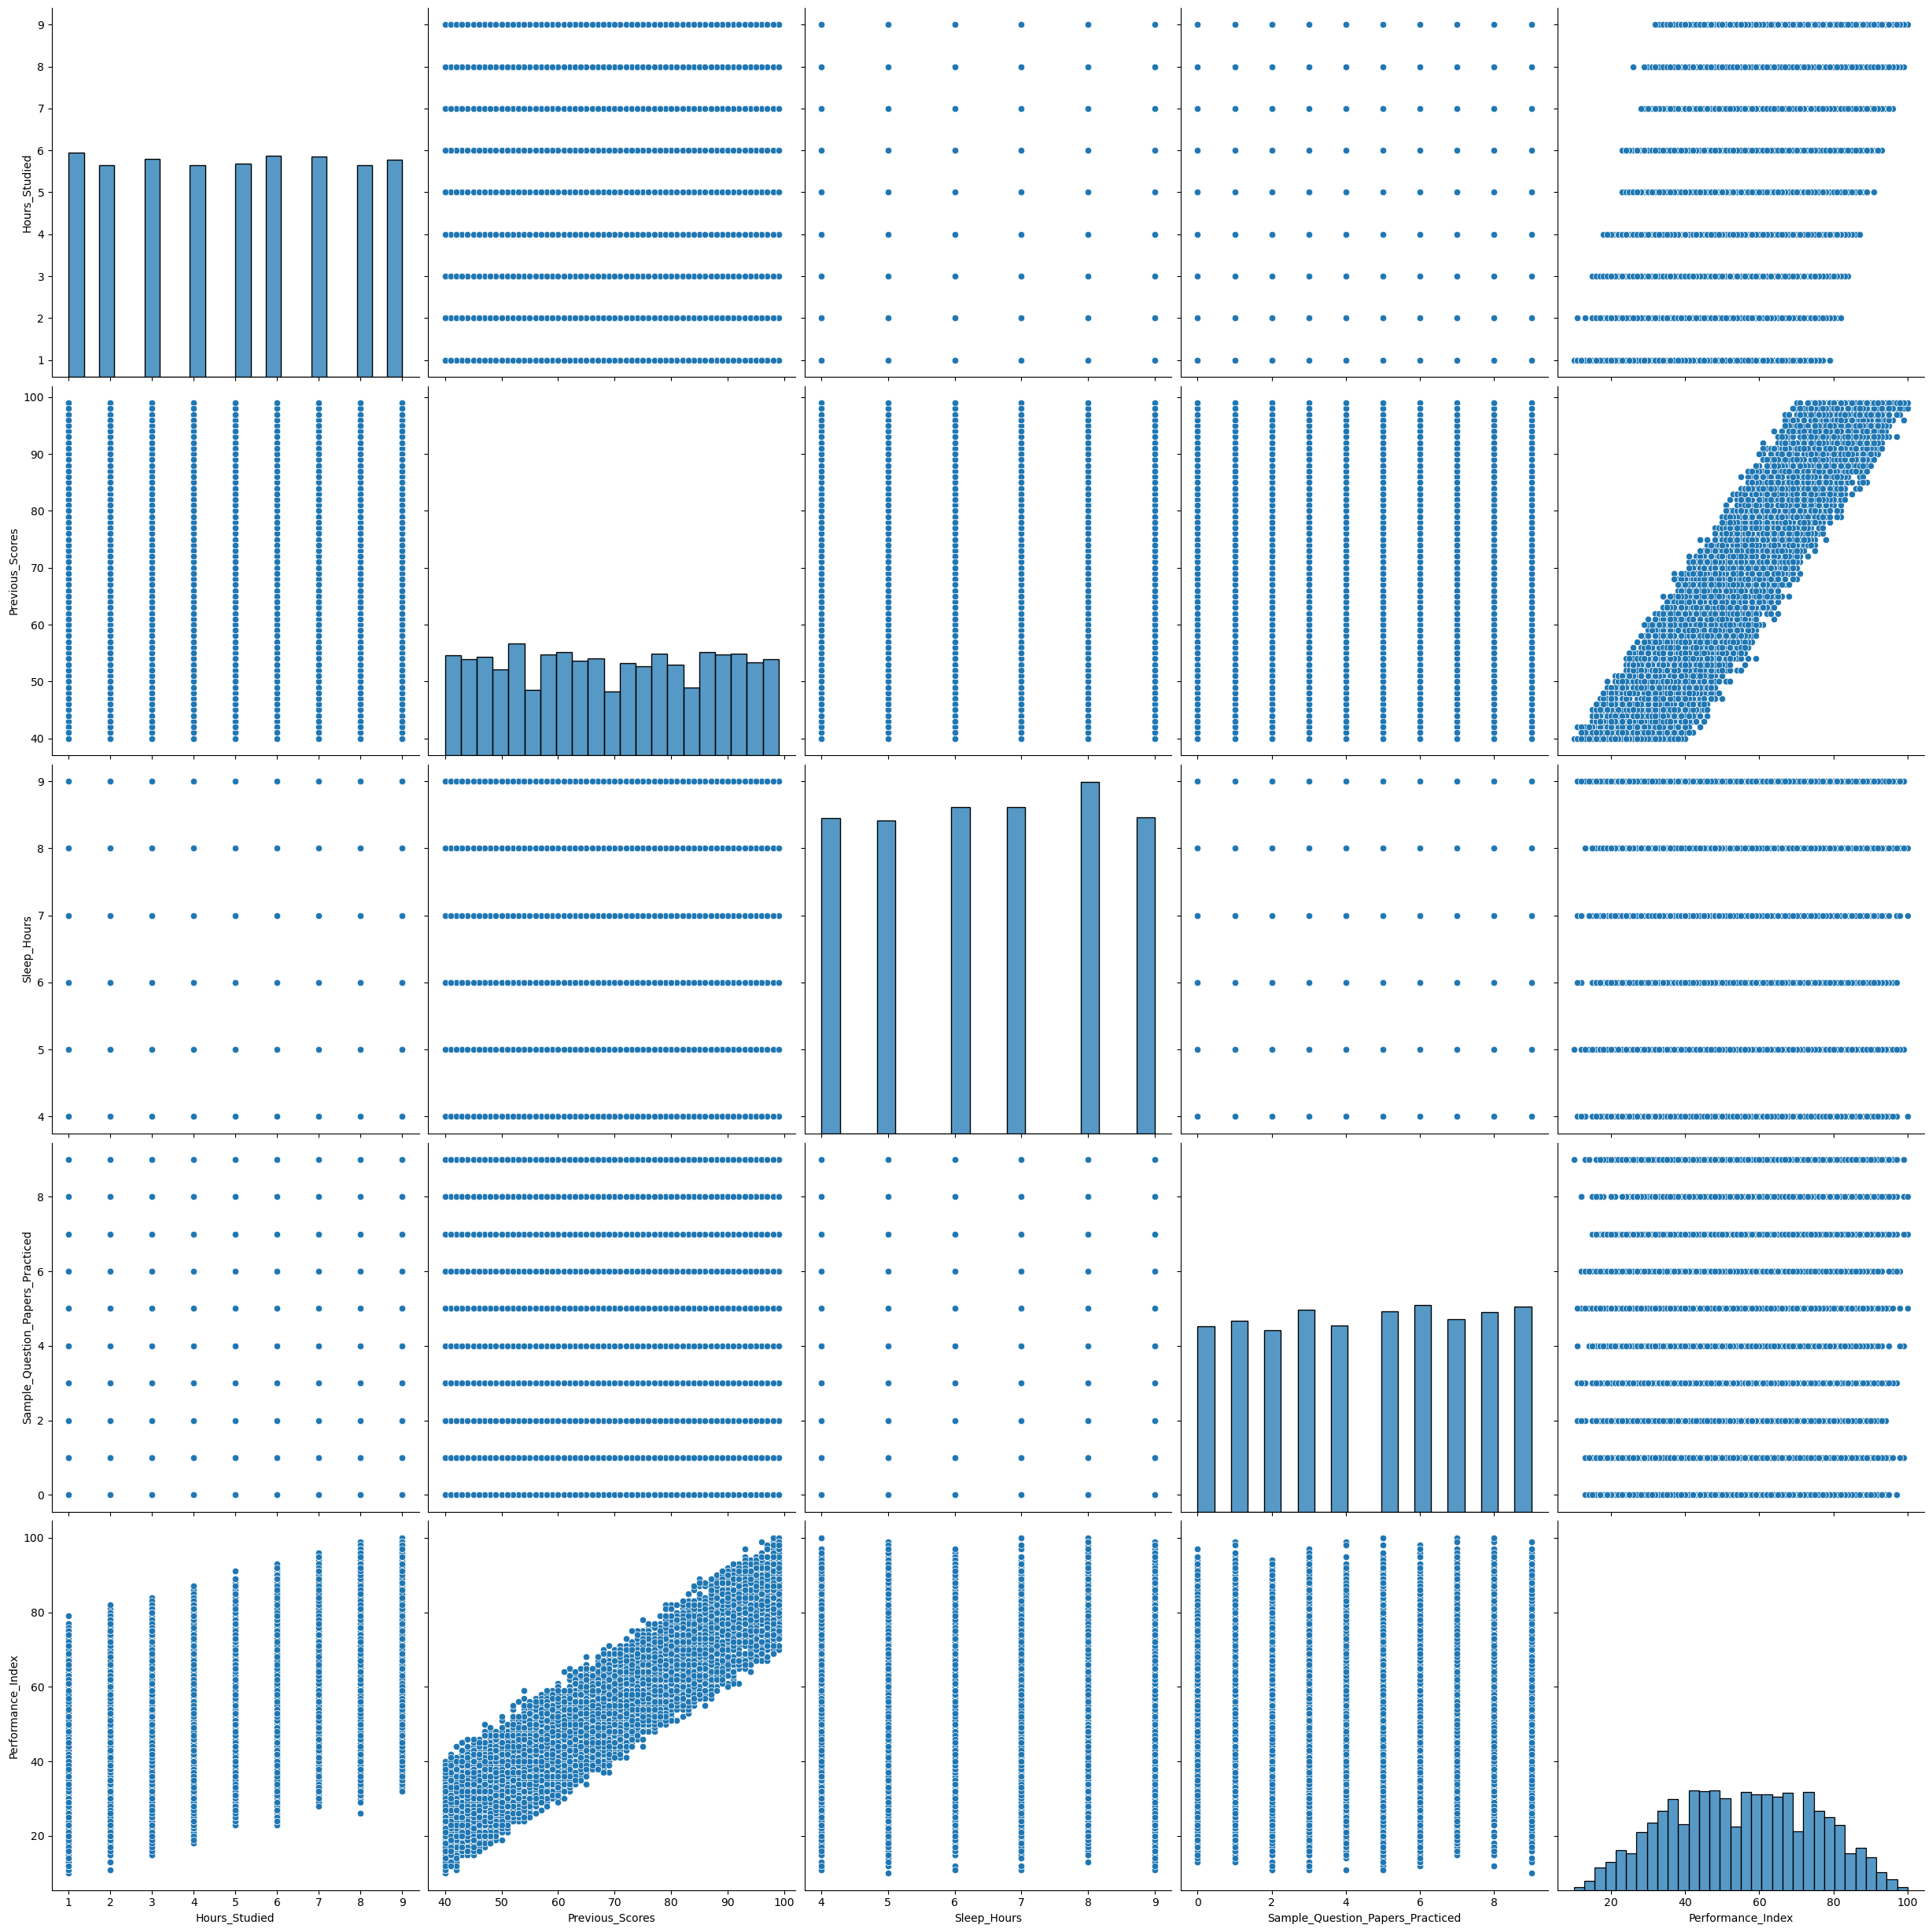

In [18]:
#Conducting a pairplot of all predictor numerical variables to see their influence on the target variable.
sns.pairplot(data, height = 5)

From the pairplot above, it can be seen that the most predictor of students' Performance index is the Previous Score where it tends to show a straight line indicating and correlation. 

### Model building

Fit a linear regression model that predicts Student's Performance Index using one of the independent variables; Previous Score
in data.

In [20]:
# Define your target variable and predictors
X = data[['Previous_Scores']]
y = data['Performance_Index']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance_Index   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 3.561e+04
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:42:46   Log-Likelihood:                -24294.
No. Observations:                7000   AIC:                         4.859e+04
Df Residuals:                    6998   BIC:                         4.861e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -15.0527      0.385    -

From the model summary above, an R-squared of 0.836 indicates that the Previous Score predicts Student's performance by 83%. Then a slope of 1.0122 in Previous Score indicates that for every 1 score increase in previous score on the avaerage, there will be a 1.0122 increase in the Student;s performance. The P.value of 0.00 indicates that there is actually a realtionship between Previous Score and Student's future performance. Hence if we had a null hypothesis that negates the relationship, It would be rejected.

Calculating and plotting the residuals with hsitogram and QQ-Plot to test for the linear regression assumptions.

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


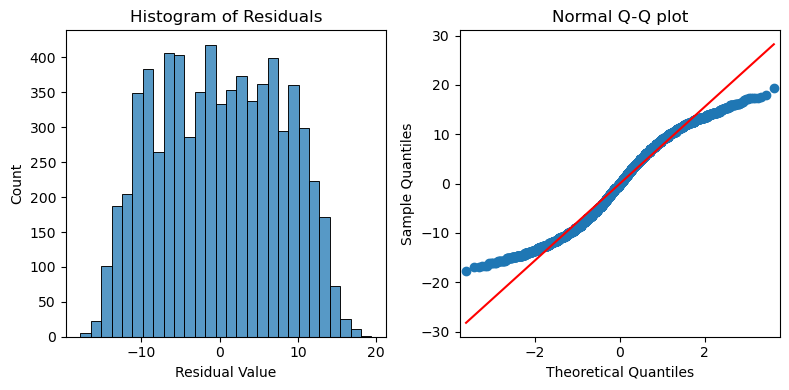

In [21]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals .

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

In [24]:
data["Extracurricular_Activities"].value_counts()

Extracurricular_Activities
No     5052
Yes    4948
Name: count, dtype: int64

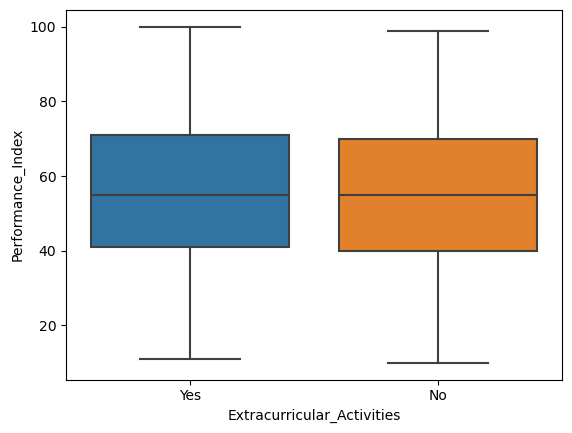

In [25]:
sns.boxplot(x = "Extracurricular_Activities", y = "Performance_Index", data = data);

### Building a multiple Regression Model

Having seen the performance of the simple linear regression where we have only the previous score and the indepedent variable, I will run a multiple linear regression now involving all the predictor variaables including the "Extracurricular_Activities" key that is categorical. That will be encoded using the OLS C("variable_name") method.

In [26]:
# Define the OLS formula.

ols_formula = 'Performance_Index ~ C(Extracurricular_Activities) + Previous_Scores + Hours_Studied + Sample_Question_Papers_Practiced'

# Create an OLS model.

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance_Index   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.890e+05
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:43:28   Log-Likelihood:                -22048.
No. Observations:               10000   AIC:                         4.411e+04
Df Residuals:                    9995   BIC:                         4.414e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -30.9460      0.108   -286.850      0.000     -31.157     -30.734
C(Extracurricular_Activities)[T.Yes]     0.5748      0.044     13.091      0.000       0.489       0.661
Previous_Scores                          1.0187      0.001    804.804      0.000       1.016       1.021
Hours_Studied                            2.8534      0.008    336.522      0.000       2.837       2.870
Sample_Question_Papers_Practiced         0.1950      0.008     25.467      0.000       0.180       0.210
==============================================================================
Omnibus:                        5.034   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.303
Skew:                           0.022   Prob(JB):                       0.0705
Kurtosis:                       3.104   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the model summary above, addding other variables to the model improved the performance by 15% making the R-Squared 0.987 ie 98%. 

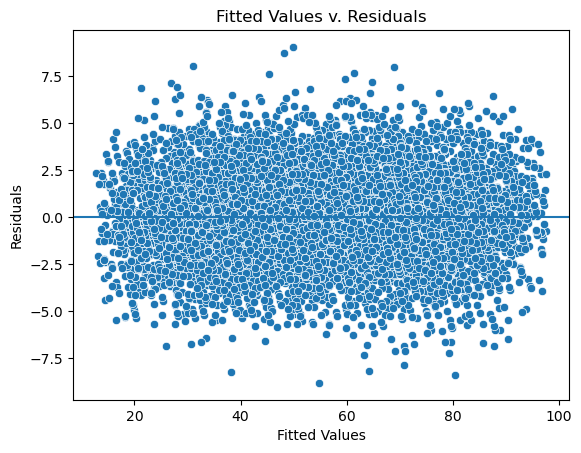

In [27]:
# Create a scatter plot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
# Set the x axis label
fig.set_xlabel("Fitted Values")
# Set the y axis label
fig.set_ylabel("Residuals")
# Set the title
fig.set_title("Fitted Values v. Residuals")
# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)
# Show the plot
plt.show()


The following can be observed when looking at the plot of the residuals above.

The residuals appear to be randomly scattered around the horizontal axis. This suggests that the variance of the residuals is constant across all levels of fitted values, indicating homoscedasticity, which is a good sign.
There are no obvious patterns or trends in the residuals, which suggests that the model is likely correctly specified.
The residuals appear to be fairly symmetrically distributed around zero
The spread appears fairly consistent across the range of fitted values, supporting the assumption of homoscedasticity.

In [30]:
# Perform the Tukey's HSD post hoc test.
tukey_oneway = pairwise_tukeyhsd(endog = data["Performance_Index"], groups = data["Extracurricular_Activities"])
# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
No,Yes,0.9424,0.0142,0.1893,1.6954,True


The ANOVA post hoc test above indicates that a null hypothesis which says there is no correlation between participation in extracurricular activities and student's performance should be rejected.

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [37]:
# Evaluate the model performance on the training data

# Add a constant to the model (this is equivalent to the intercept)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the model
model = sm.OLS(y_train, X_train_const).fit()

# Evaluate the model performance on the training data
y_pred_train = model.predict(X_train_const)

# Calculate performance metrics
r_sq = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)

# Print the performance metrics
print('Coefficient of determination (R^2):', r_sq)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Coefficient of determination (R^2): 0.8357610317621129
Mean Absolute Error (MAE): 6.645113972957132
Mean Squared Error (MSE): 60.53289016907393
Root Mean Squared Error (RMSE): 7.780288565925684


#### Testing the model on the test data

In [43]:
# Fit the model
model = sm.OLS(y_test, X_test_const).fit()

# Evaluate the model performance on the test data
y_pred_test = model.predict(X_test_const)

# Calculate performance metrics
r_sq = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

# Print the performance metrics
print('Coefficient of determination (R^2):', r_sq)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Coefficient of determination (R^2): 0.8416949414773612
Mean Absolute Error (MAE): 6.527152800257482
Mean Squared Error (MSE): 58.582325983260354
Root Mean Squared Error (RMSE): 7.6539091961729175


The evaluation of the model above shows that it performed even better on the test data. Hence it is expected to measure and predict effectively if deployed to tasks.

In summary, having observed the performance of the models, we can say that there is a strong relationship between Extracurricular_Activities, Previous_Scores, Hours_Studied, Sample_Question_Papers_Practiced and Student's Performance statistically proven.

Note that the data set was obtained from the Machine Learning Data Repo: https://archive.ics.uci.edu/